# Peter Moss Acute Myeloid / Lymphoblastic Leukemia AI Research Project

## ALL FastAI Resnet 50 Classifier
**Using The ALL Image Database for Image Processing & The Leukemia Blood Cell Image Classification Using Convolutional Neural Network Research Paper**    

![Peter Moss Acute Myeloid / Lymphoblastic Leukemia AI Research Project](https://www.PeterMossAmlAllResearch.com/media/images/banner.png)

The ALL FastAI Resnet 50 Classifier was created by [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli"). The project provides a Google Colab notebook that uses FastAI with Resnet50 and ALL_IDB2 from the [Acute Lymphoblastic Leukemia Image Database for Image Processing dataset](https://homes.di.unimi.it/scotti/all/).

# ALL Image Database for Image Processing by Fabio Scotti

![Acute Lymphoblastic Leukemia Image Database for Image Processing](https://github.com/AMLResearchProject/AML-ALL-Detection-System/raw/master/Classifiers/Movidius/NCS/Tensorflow/V1/Media/Images/slides.png)
_Fig 1. Samples of augmented data generated using the Acute Lymphoblastic Leukemia Image Database for Image Processing dataset._

The [Acute Lymphoblastic Leukemia Image Database for Image Processing](https://homes.di.unimi.it/scotti/all/) dataset created by [Fabio Scotti, Associate Professor Dipartimento di Informatica, Università degli Studi di Milano](https://homes.di.unimi.it/scotti/) is used in this notebook. You can request permission by following the steps provided on [this page](https://homes.di.unimi.it/scotti/all/#download). 

*The **ALL_IDB2** is a dataset composed by cropped images where a single linphocyte cell is placed in the center. As described in the website, the image are labeled with a progressive integer number and Y a boolean value (ImXXX_Y.jpg). Y equal to 1 is identifying to a blastic cell (cancer cell) where 0 is a normal cell (not cancer cell).  All the images with Y = 0 are coming from healthy individuals where Y = 1 are acquired from the ALL patient blood samples.*

## Gain Access To ALL-IDB

You you need to be granted access to use the Acute Lymphoblastic Leukemia Image Database for Image Processing dataset. You can find the application form and information about getting access to the dataset on [this page](https://homes.di.unimi.it/scotti/all/#download) as well as information on how to contribute back to the project [here](https://homes.di.unimi.it/scotti/all/results.php).

# Clone Peter Moss AML & ALL Classifiers Repository

First of all you should clone the [AML & ALL Classifiers](https://github.com/AMLResearchProject/AML-ALL-Classifiers/ "AML & ALL Classifiers") repo to your device. To do this you can navigate to the location you want to clone the repository to on your device using terminal (cd Your/Clone/Location), and then use the following command:

```
  $ git clone https://github.com/AMLResearchProject/AML-ALL-Classifiers.git
```

Once you have used the command above you will see a directory called **AML-ALL-Classifiers** in the location you chose to clone the repo to. In terminal, navigate to the **AML-ALL-Classifiers/Python/_FastAI/Resnet50** directory, this is your project root directory.

You will find this tutorial in the location: *AML-ALL-Classifiers/Python/_FastAI/Resnet50/ALL-FastAI-Resnet-50.ipynb*, you can upload this to Google Colab and continue with this tutorial.

# Google Drive / Colab
This tutorial assumes you have access to [Google Drive](https://www.google.com/drive/) with enough space to save the dataset and related files. It is also assumed that you have access to [Google Colab](https://colab.research.google.com).

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/fastai-v3/ALL_IDB2"

Go to this URL in a browser: ########
Enter your authorization code:
··········
Mounted at /content/gdrive


## Import data to Google Drive
You need to import **ALL_IDB2** from the [Acute Lymphoblastic Leukemia Image Database for Image Processing dataset](https://homes.di.unimi.it/scotti/all/) dataset, to do this you need to request permission from Fabio Scotti, the creator of the dataset. You can request permission by following the steps provided on [this page](https://homes.di.unimi.it/scotti/all/#download). 

Once you have permission you need to upload the negative and positive examples provided in **ALL_IDB2** to your Google Drive. In this tutorial we assume you have uploaded your copy of the dataset to a folder located on your Google drive with the location: *AML-ALL-Classifiers/Python/_FastAI*. Once you have uploaded the dataset you can continue with this tutorial.

## Google Colab 

**You should now be running this tutorial on Google Colab, if not please read this tutorial from the beginning. **  

First we need import the Google Colab Drive library, mount our dataset drive from Google Drive, and set the path to the ALL_IDB2 folder on your drive. Run the following code block to do this. You will be asked to click a link that will authorize the application with the permissions it needs to mount your drive etc. Follow the steps and then past the authorization key into this application.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
fnames = get_image_files(root_dir)
fnames[:5]

[PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im238_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im235_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im236_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im239_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im237_0.tif')]

importing the database and generating the data bunch

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
pat = r'/\w+_(\d)\.tif$'

In [0]:
data = ImageDataBunch.from_name_re(root_dir, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

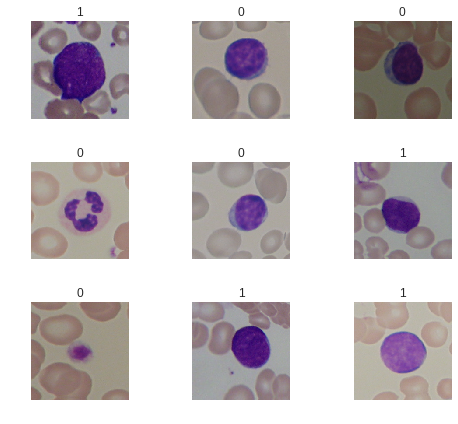

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['0', '1']


(2, 2)

testing res50 architecture

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


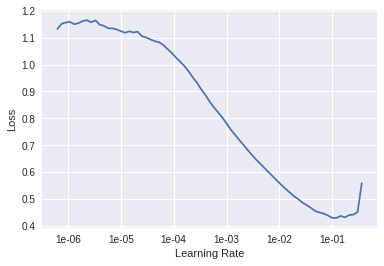

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 0.001
learn.fit_one_cycle(5, lr)

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


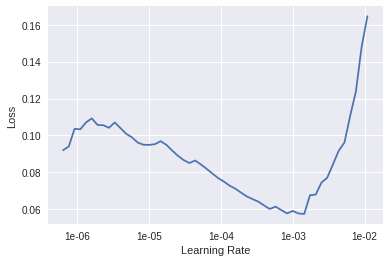

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 0.0001
learn.fit_one_cycle(5, slice(1e-5, 1e-3))

# Contributing

The Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research project encourages and welcomes code contributions, bug fixes and enhancements from the Github.

Please read the [CONTRIBUTING](https://github.com/AMLResearchProject/AML-ALL-Classifiers/blob/master/CONTRIBUTING.md "CONTRIBUTING") document for a full guide to forking our repositories and submitting your pull requests. You will also find information about our code of conduct on this page.

## Acute Myeloid & Lymphoblastic Leukemia Classifiers Contributors

- [Adam Milton-Barker](https://github.com/AdamMiltonBarker "Adam Milton-Barker") - Bigfinite IoT Network Engineer & Intel Software Innovator, Barcelona, Spain
- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - PhD Immunolgy / Bioinformaticia, Bologna, Italy
- [Dr Amita Kapoor](https://github.com/salvatorera "Dr Amita Kapoor") - Delhi University, Delhi, India

&nbsp;

# Versioning

We use SemVer for versioning. For the versions available, see [Releases](https://github.com/AMLResearchProject/AML-ALL-Classifiers/releases "Releases").

# License

This project is licensed under the **MIT License** - see the [LICENSE](https://github.com/AMLResearchProject/AML-ALL-Classifiers/blob/master/LICENSE "LICENSE") file for details.

# Bugs/Issues

We use the [repo issues](https://github.com/AMLResearchProject/AML-ALL-Classifiers/issues "repo issues") to track bugs and general requests related to using this project.
